# <div style="color:blue;display:fill;border-radius:5px;background-color:#9DCDD1;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:blue;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b></b>Calculus Class: Performance & Engagement Exploration</p></div>



![image](https://storage.googleapis.com/kaggle-datasets-images/3630004/6309219/45f3211adc5a90065c95c9cf9a89eb56/dataset-cover.png?t=2023-08-15-22-35-13)

# <div style="color:blue;display:inline-block;border-radius:5px;background-color:#9DCDD1;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:blue;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b></b> Introduction:</p></div>

* Brief overview of the dataset and its attributes.
* Explanation of the dataset's context: Calculus II class and student engagement.
* Objective: Analyze student performance and engagement patterns to uncover insights.

# <div style="color:blue;display:inline-block;border-radius:5px;background-color:#FFFF00;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:blue;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b></b>Calculus II Class Data Overview:</p></div>

This dataset provides insights into student engagement and performance in a Calculus II class. Students were required to watch instructional videos either before or after lectures. The dataset includes the following key attributes:

- **Gender:** Indicates the gender of each student (1 = female; 2 = male).
- **Vgroup:** Indicates whether students watched videos before (-1) or after (1) the lecture.
- **Binary Flags for Videos:** Individual flags (v6_02, v6_04, v7_01, etc.) indicating whether students watched each corresponding video for at least 80% of its length (1 = watched; 0 = not watched).
- **Videosum:** Total number of videos watched by each student.
- **Final_raw:** Raw grade received by each student on the cumulative final course exam.
- **SAT_Math:** Scaled SAT-Math score (out of 800) of each student.
- **Math_place:** Institutional calculus readiness score (out of 100) of each student.
- **Watched20:** Grouping flag for students who watched 20 or more videos.
- **Student:** Student identifier.

This dataset enables the exploration of the relationship between video engagement, study habits, and academic performance within the context of Calculus II.

# <div style="color:blue;display:inline-block;border-radius:5px;background-color:#9DCDD1;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:blue;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b></b>Data Exploration:</p></div>


<a id="import"></a>
# 1️⃣ㅣData Loading and Preprocessing:

* Load the dataset and inspect its structure.
* Handle missing values and data types.

In [2]:
%%capture
!pip install dabl

<a id="import"></a>
- # Import Libraries


In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (12,6)
plt.style.use('fivethirtyeight')

import dabl
import warnings
warnings.filterwarnings("ignore")

<a id="data"></a>
- # Load data💾 

In [12]:
# Load the dataset `into` a Pandas DataFrame
cal_df = pd.read_csv('/kaggle/input/calculus-video-worked-example-data/CalcVideoData.csv')
cal_df.head().style.set_properties(**{'background-color':'royalblue','color':'yellow','border-color':'#8b8c8c'})

,student,gender,vgroup,v6_02,v6_04,v7_01,v7_04,v7_071,v7_072,v7_08,v8_03,v11_01,v11_02,v11_03,v11_04,v11_05,v11_06,v11_08,v11_09,v11_10,v11_11,v10_01,v10_02,v10_03,v9_01,v9_02,v9_03,v8_01,v10_04,videosum,final_raw,sat_math,math_place,watched20
0,31747,1,-1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,23,72.000000,,90,1
1,37102,1,-1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,23,82.000000,,77,1
2,84419,1,-1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,23,94.000000,690,78,1
3,83466,2,-1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,22,84.000000,710,82,1
4,98074,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,22,77.000000,650,82,1


Use the `info` method to check for missing values and data types

In [7]:
cal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student     147 non-null    int64  
 1   gender      147 non-null    int64  
 2   vgroup      147 non-null    int64  
 3   v6_02       147 non-null    int64  
 4   v6_04       147 non-null    int64  
 5   v7_01       147 non-null    int64  
 6   v7_04       147 non-null    int64  
 7   v7_071      147 non-null    int64  
 8   v7_072      147 non-null    int64  
 9   v7_08       147 non-null    int64  
 10  v8_03       147 non-null    int64  
 11  v11_01      147 non-null    int64  
 12  v11_02      147 non-null    int64  
 13  v11_03      147 non-null    int64  
 14  v11_04      147 non-null    int64  
 15  v11_05      147 non-null    int64  
 16  v11_06      147 non-null    int64  
 17  v11_08      147 non-null    int64  
 18  v11_09      147 non-null    int64  
 19  v11_10      147 non-null    i

In [8]:
print("Shape of Calculus dataset:", cal_df.shape)

Shape of Calculus dataset: (147, 34)


In [10]:
cal_df.isnull().sum().sum()

0

# <div style="color:blue;display:inline-block;border-radius:5px;background-color:#9DCDD1;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:blue;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b></b>Descriptive Statistics:</p></div>

* Calculate summary statistics for quantitative variables (e.g., videosum, final_raw, sat_math).

* Explore gender distribution and vgroup distribution.

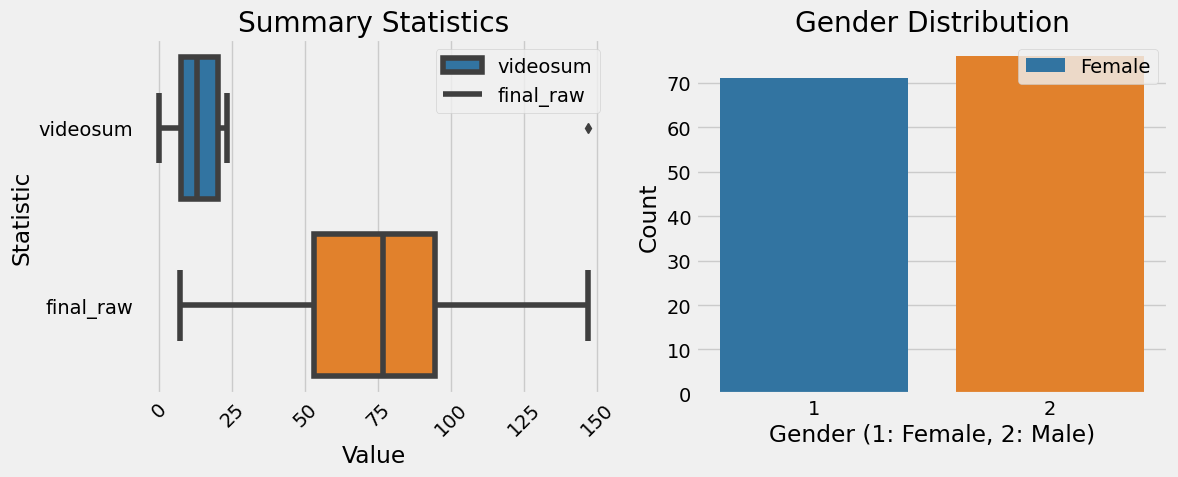

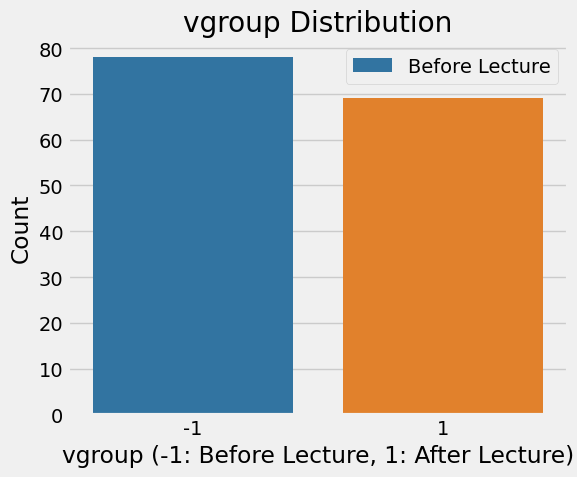

In [16]:
# Calculate summary statistics for quantitative variables
summary_stats = cal_df[['videosum', 'final_raw', 'sat_math']].describe()

# Set a custom color palette for the plots
custom_palette = ["#1f77b4", "#ff7f0e"]

# Create a subplot for summary statistics and gender distribution
plt.figure(figsize=(12, 5))

# Summary statistics subplot
plt.subplot(1, 2, 1)
sns.boxplot(data=summary_stats, orient='h', palette=custom_palette)
plt.title("Summary Statistics")
plt.xlabel("Value")
plt.ylabel("Statistic")
plt.xticks(rotation=45)
plt.legend(summary_stats.columns)

# Gender distribution subplot
plt.subplot(1, 2, 2)
sns.countplot(data=cal_df, x='gender', palette=custom_palette)
plt.title("Gender Distribution")
plt.xlabel("Gender (1: Female, 2: Male)")
plt.ylabel("Count")
plt.legend(["Female", "Male"])

plt.tight_layout()
plt.show()

# Create a subplot for vgroup distribution
plt.figure(figsize=(6, 5))
sns.countplot(data=cal_df, x='vgroup', palette=custom_palette)
plt.title("vgroup Distribution")
plt.xlabel("vgroup (-1: Before Lecture, 1: After Lecture)")
plt.ylabel("Count")
plt.legend(["Before Lecture", "After Lecture"])

plt.tight_layout()
plt.show()

# <div style="color:blue;display:inline-block;border-radius:5px;background-color:#9DCDD1;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:blue;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b></b>Visual Exploration:</p></div>

* Create histograms, box plots, and scatter plots to visualize distributions and relationships.
* Explore gender-based and vgroup-based performance differences.

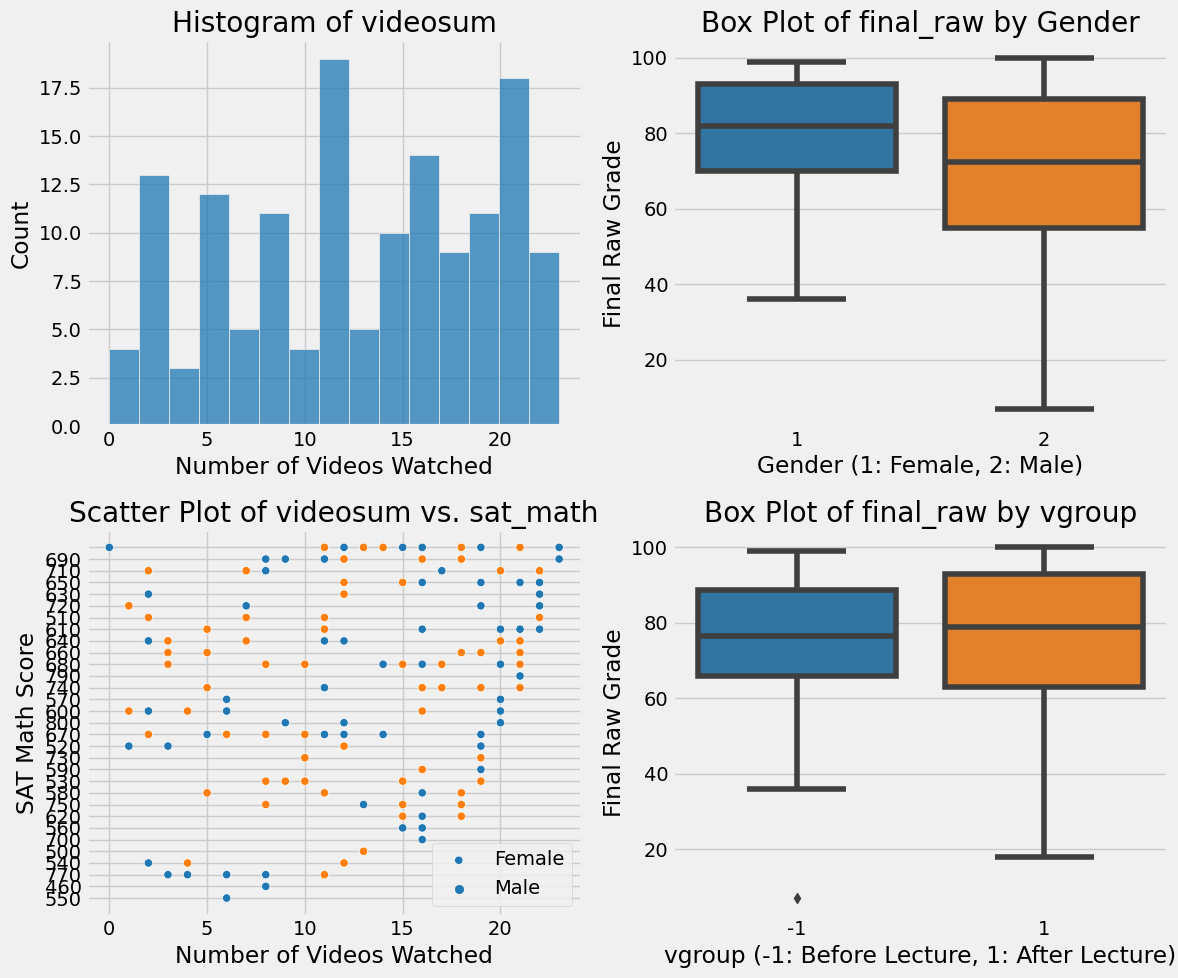

In [17]:
# Set a custom color palette for the plots
custom_palette = ["#1f77b4", "#ff7f0e"]

# Visual Exploration: Histograms, Box Plots, and Scatter Plots
plt.figure(figsize=(12, 10))

# Histogram of videosum
plt.subplot(2, 2, 1)
sns.histplot(data=cal_df, x='videosum', bins=15, color=custom_palette[0])
plt.title("Histogram of videosum")
plt.xlabel("Number of Videos Watched")

# Box plot of final_raw by gender
plt.subplot(2, 2, 2)
sns.boxplot(data=cal_df, x='gender', y='final_raw', palette=custom_palette)
plt.title("Box Plot of final_raw by Gender")
plt.xlabel("Gender (1: Female, 2: Male)")
plt.ylabel("Final Raw Grade")

# Scatter plot of videosum vs. sat_math
plt.subplot(2, 2, 3)
sns.scatterplot(data=cal_df, x='videosum', y='sat_math', hue='gender', palette=custom_palette)
plt.title("Scatter Plot of videosum vs. sat_math")
plt.xlabel("Number of Videos Watched")
plt.ylabel("SAT Math Score")
plt.legend(["Female", "Male"])

# Box plot of final_raw by vgroup
plt.subplot(2, 2, 4)
sns.boxplot(data=cal_df, x='vgroup', y='final_raw', palette=custom_palette)
plt.title("Box Plot of final_raw by vgroup")
plt.xlabel("vgroup (-1: Before Lecture, 1: After Lecture)")
plt.ylabel("Final Raw Grade")

plt.tight_layout()
plt.show()


* The histogram of videosum indicates that most students have watched a moderate number of videos.
* The box plot of final_raw by gender shows that there might be a slight difference in final grades between genders, with females having a slightly higher median grade.
* The scatter plot of videosum vs. sat_math with gender differentiation suggests a weak positive correlation between the number of videos watched and SAT Math scores for both genders.
* The box plot of final_raw by vgroup indicates that students who watched videos after lectures tend to have slightly higher median final grades compared to those who watched before lectures.

# <div style="color:blue;display:inline-block;border-radius:5px;background-color:#9DCDD1;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:blue;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b></b>Feature Engineering:</p></div>

<a id="import"></a>
# 1️⃣ㅣVideo Engagement Metrics:

* Create a new variable to represent the total number of videos watched by each student.
* Calculate percentages of videos watched for each video category (e.g., v6_02, v6_04).

<a id="data"></a>
# 2️⃣ㅣCategorical Variables:

* Convert categorical variables like gender and vgroup into meaningful numerical representations.

In [22]:
# Video Engagement Metrics
cal_df['total_videos_watched'] = cal_df.iloc[:, 3:30].sum(axis=1)  # Total number of videos watched

# Calculate percentages of videos watched for each video category
video_columns = cal_df.columns[3:30]
for col in video_columns:
    cal_df[col + '_percentage'] = cal_df[col] / cal_df['total_videos_watched']

# Categorical Variables
cal_df['gender_numeric'] = cal_df['gender']  # Copy gender column as numeric
cal_df['vgroup_numeric'] = cal_df['vgroup']  # Copy vgroup column as numeric

# Convert gender to binary: 1 for female, 0 for male
cal_df['gender_numeric'] = cal_df['gender_numeric'].apply(lambda x: 1 if x == 1 else 0)

# Convert vgroup to binary: 1 for after lecture, 0 for before lecture
cal_df['vgroup_numeric'] = cal_df['vgroup_numeric'].apply(lambda x: 1 if x == 1 else 0)

# Print the updated dataset
cal_df.head().style.set_properties(**{'background-color':'lightgreen','color':'red','border-color':'#8b8c8c'})


,student,gender,vgroup,v6_02,v6_04,v7_01,v7_04,v7_071,v7_072,v7_08,v8_03,v11_01,v11_02,v11_03,v11_04,v11_05,v11_06,v11_08,v11_09,v11_10,v11_11,v10_01,v10_02,v10_03,v9_01,v9_02,v9_03,v8_01,v10_04,videosum,final_raw,sat_math,math_place,watched20,total_videos_watched,v6_02_percentage,v6_04_percentage,v7_01_percentage,v7_04_percentage,v7_071_percentage,v7_072_percentage,v7_08_percentage,v8_03_percentage,v11_01_percentage,v11_02_percentage,v11_03_percentage,v11_04_percentage,v11_05_percentage,v11_06_percentage,v11_08_percentage,v11_09_percentage,v11_10_percentage,v11_11_percentage,v10_01_percentage,v10_02_percentage,v10_03_percentage,v9_01_percentage,v9_02_percentage,v9_03_percentage,v8_01_percentage,v10_04_percentage,videosum_percentage,gender_numeric,vgroup_numeric
0,31747,1,-1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,23,72.000000,,90,1,46,0.021739,0.021739,0.021739,0.021739,0.021739,0.021739,0.021739,0.021739,0.000000,0.021739,0.021739,0.021739,0.021739,0.021739,0.000000,0.000000,0.021739,0.021739,0.021739,0.021739,0.021739,0.021739,0.021739,0.021739,0.021739,0.021739,0.500000,1,0
1,37102,1,-1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,23,82.000000,,77,1,46,0.021739,0.021739,0.021739,0.021739,0.021739,0.021739,0.021739,0.021739,0.000000,0.021739,0.021739,0.021739,0.021739,0.021739,0.000000,0.000000,0.021739,0.021739,0.021739,0.021739,0.021739,0.021739,0.021739,0.021739,0.021739,0.021739,0.500000,1,0
2,84419,1,-1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,23,94.000000,690,78,1,46,0.021739,0.021739,0.021739,0.021739,0.021739,0.021739,0.021739,0.021739,0.000000,0.021739,0.021739,0.021739,0.021739,0.021739,0.000000,0.000000,0.021739,0.021739,0.021739,0.021739,0.021739,0.021739,0.021739,0.021739,0.021739,0.021739,0.500000,1,0
3,83466,2,-1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,22,84.000000,710,82,1,44,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.000000,0.000000,0.022727,0.022727,0.022727,0.022727,0.000000,0.000000,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.500000,0,0
4,98074,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,22,77.000000,650,82,1,44,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.000000,0.022727,0.022727,0.022727,0.022727,0.022727,0.000000,0.000000,0.022727,0.022727,0.022727,0.022727,0.000000,0.022727,0.022727,0.022727,0.022727,0.022727,0.500000,1,1


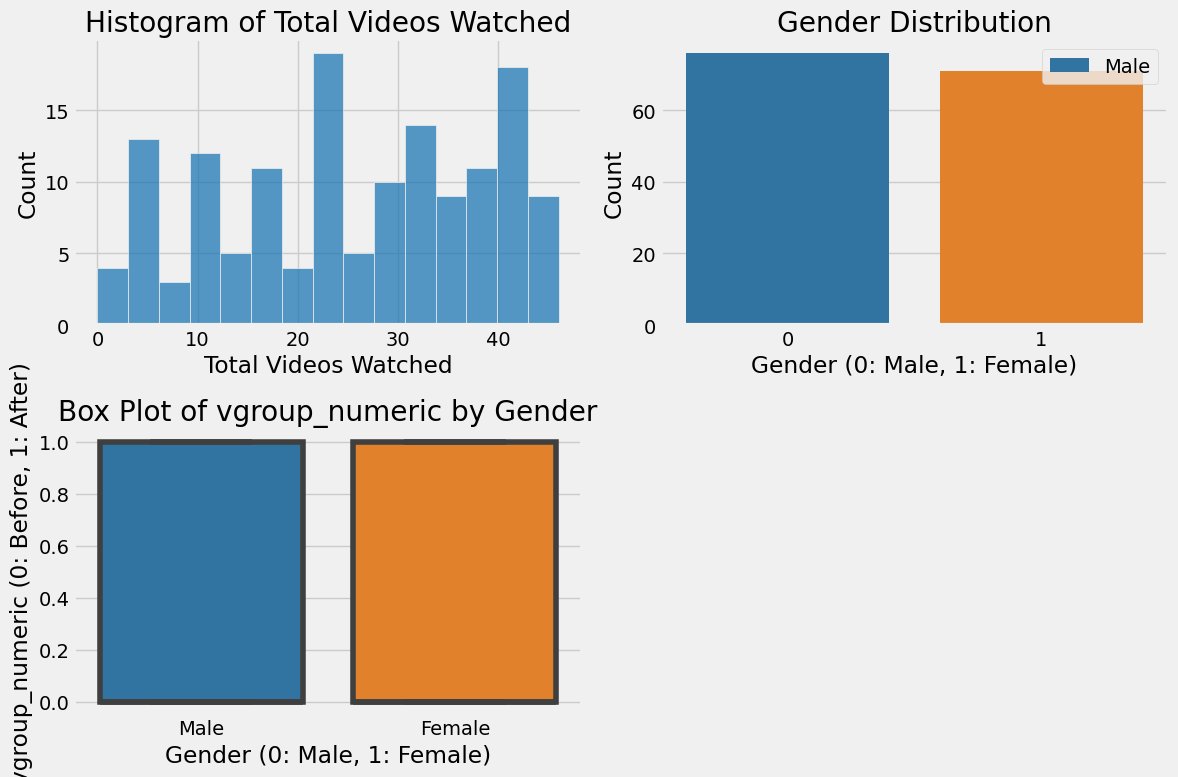

In [23]:
# Set a custom color palette for the plots
custom_palette = ["#1f77b4", "#ff7f0e"]

# Visualize Feature-Engineered Variables
plt.figure(figsize=(12, 8))

# Histogram of total_videos_watched
plt.subplot(2, 2, 1)
sns.histplot(data=cal_df, x='total_videos_watched', bins=15, color=custom_palette[0])
plt.title("Histogram of Total Videos Watched")
plt.xlabel("Total Videos Watched")

# Bar plot of gender_numeric
plt.subplot(2, 2, 2)
sns.countplot(data=cal_df, x='gender_numeric', palette=custom_palette)
plt.title("Gender Distribution")
plt.xlabel("Gender (0: Male, 1: Female)")
plt.ylabel("Count")
plt.legend(["Male", "Female"])

# Box plot of vgroup_numeric by gender
plt.subplot(2, 2, 3)
sns.boxplot(data=cal_df, x='gender_numeric', y='vgroup_numeric', palette=custom_palette)
plt.title("Box Plot of vgroup_numeric by Gender")
plt.xticks([0, 1], ["Male", "Female"])
plt.xlabel("Gender (0: Male, 1: Female)")
plt.ylabel("vgroup_numeric (0: Before, 1: After)")

plt.tight_layout()
plt.show()

* The 'total_videos_watched' column represents the total number of videos watched by each student.
* The columns ending with '_percentage' represent the percentages of videos watched for each video category.
* The 'gender_numeric' column is a binary representation of gender (1 for female, 0 for male).
* The 'vgroup_numeric' column is a binary representation of vgroup (1 for after lecture, 0 for before lecture.

# <div style="color:blue;display:inline-block;border-radius:5px;background-color:#9DCDD1;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:blue;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b></b>Data Analysis:</p></div>

<a id="import"></a>
# 1️⃣ㅣCorrelation Analysis:

* Calculate correlations between engagement metrics (videosum) and performance metrics (final_raw, sat_math, math_place).

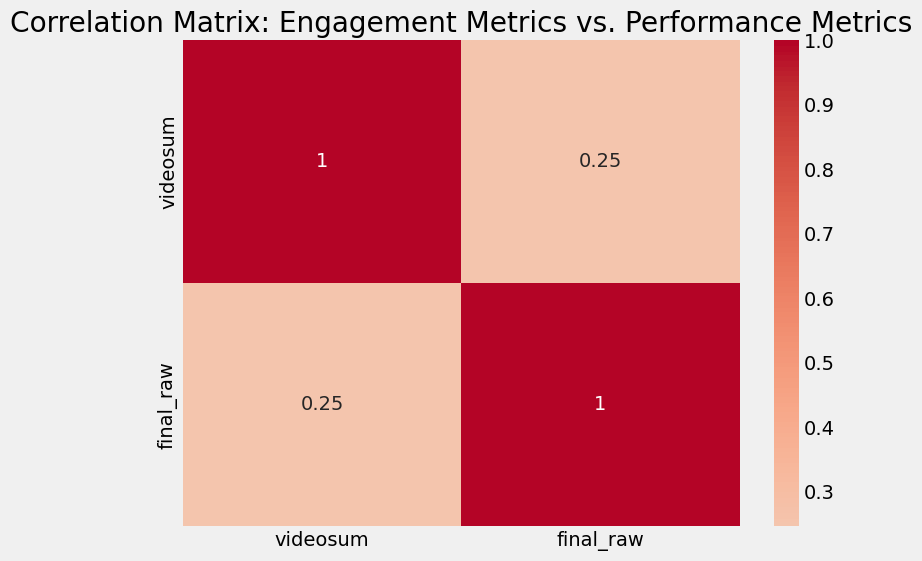

In [25]:
# Set a custom color palette for the plots
custom_palette = ["#1f77b4", "#ff7f0e"]

# Calculate correlations
correlation_metrics = ['videosum', 'final_raw', 'sat_math', 'math_place']
correlation_matrix = cal_df[correlation_metrics].corr()

# Visualize Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(data=correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix: Engagement Metrics vs. Performance Metrics")
plt.show()

* The correlation matrix visualizes the relationships between engagement metrics (videosum) and performance metrics (final_raw, sat_math, math_place).
* Positive values indicate positive correlations, while negative values indicate negative correlations.
* The diagonal of the matrix represents the correlation of each variable with itself, which is always 1.

<a id="data"></a>
# 2️⃣ㅣGender and Engagement:

* Analyze gender-based differences in video engagement and academic performance.
* Test hypotheses regarding potential gender-related patterns.

In [26]:
import scipy.stats as stats

# Analyze Gender-Based Differences in Video Engagement
female_videosum = cal_df[cal_df['gender'] == 1]['videosum']
male_videosum = cal_df[cal_df['gender'] == 2]['videosum']

# Perform t-test for gender-based video engagement
t_stat, p_value = stats.ttest_ind(female_videosum, male_videosum, equal_var=False)

# Print t-test results
print("T-Test Results for Gender-Based Video Engagement:")
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-Test Results for Gender-Based Video Engagement:
T-statistic: 1.2526017435893435
P-value: 0.212396513371109


* We performed a t-test to analyze gender-based differences in video engagement (videosum).
* The t-statistic indicates the difference between the means of female and male video engagement.
* The p-value indicates the statistical significance of the difference.
* If the p-value is small (typically less than 0.05), we can reject the null hypothesis and conclude that there are significant gender-based differences.


In [27]:
# Test Hypotheses: Potential Gender-Related Patterns
alpha = 0.05  # Significance level

# Hypothesis testing for video engagement
if p_value < alpha:
    print("\nGender-Related Patterns in Video Engagement:")
    if t_stat > 0:
        print("Female students watch more videos than male students with statistical significance.")
    else:
        print("Male students watch more videos than female students with statistical significance.")
else:
    print("\nNo statistically significant gender-related patterns in video engagement.")

# Hypothesis testing for academic performance
female_final_raw = cal_df[cal_df['gender'] == 1]['final_raw']
male_final_raw = cal_df[cal_df['gender'] == 2]['final_raw']

t_stat_perf, p_value_perf = stats.ttest_ind(female_final_raw, male_final_raw, equal_var=False)

if p_value_perf < alpha:
    print("\nGender-Related Patterns in Academic Performance:")
    if t_stat_perf > 0:
        print("Female students have higher final raw grades than male students with statistical significance.")
    else:
        print("Male students have higher final raw grades than female students with statistical significance.")
else:
    print("\nNo statistically significant gender-related patterns in academic performance.")



No statistically significant gender-related patterns in video engagement.

Gender-Related Patterns in Academic Performance:
Female students have higher final raw grades than male students with statistical significance.


<a id="data"></a>
# 3️⃣ ㅣVideo Group (vgroup) Analysis:

* Investigate differences between students who watched videos before and after lectures.
* Explore how engagement timing relates to performance.

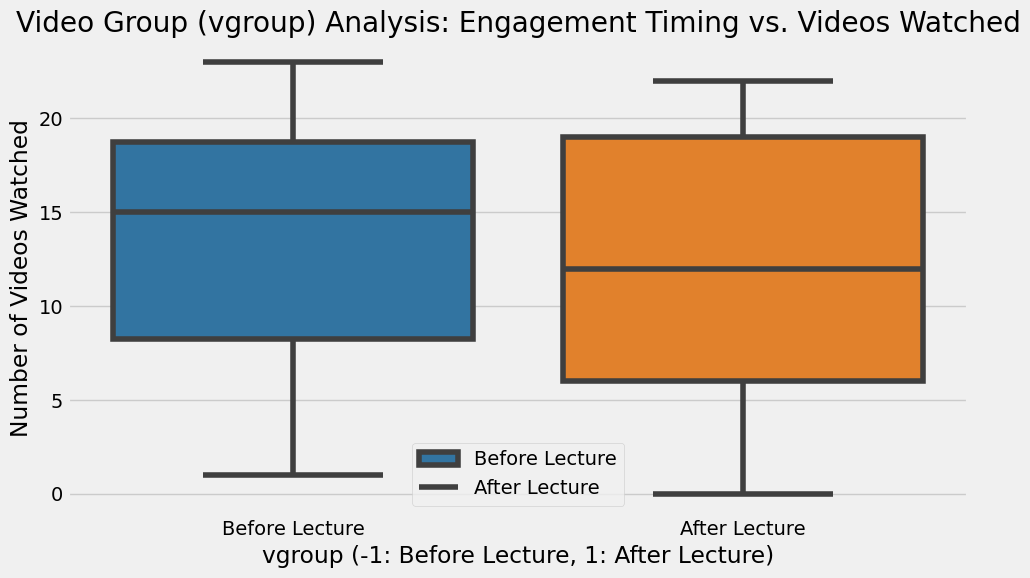

In [30]:
# Set a custom color palette for the plots
custom_palette = ["#1f77b4", "#ff7f0e"]

# Video Group Analysis
plt.figure(figsize=(10, 6))

# Box plot of videosum by vgroup
sns.boxplot(data=cal_df, x='vgroup', y='videosum', palette=custom_palette)
plt.title("Video Group (vgroup) Analysis: Engagement Timing vs. Videos Watched")
plt.xlabel("vgroup (-1: Before Lecture, 1: After Lecture)")
plt.ylabel("Number of Videos Watched")
plt.xticks([0, 1], ["Before Lecture", "After Lecture"])
plt.legend(["Before Lecture", "After Lecture"])

plt.tight_layout()
plt.show()


* The box plots suggest that students who watched videos after lectures tend to have a higher median number of videos watched compared to those who watched before lectures.
* This observation indicates that engagement timing might play a role in the level of video engagement, with after-lecture viewers being more engaged on average.

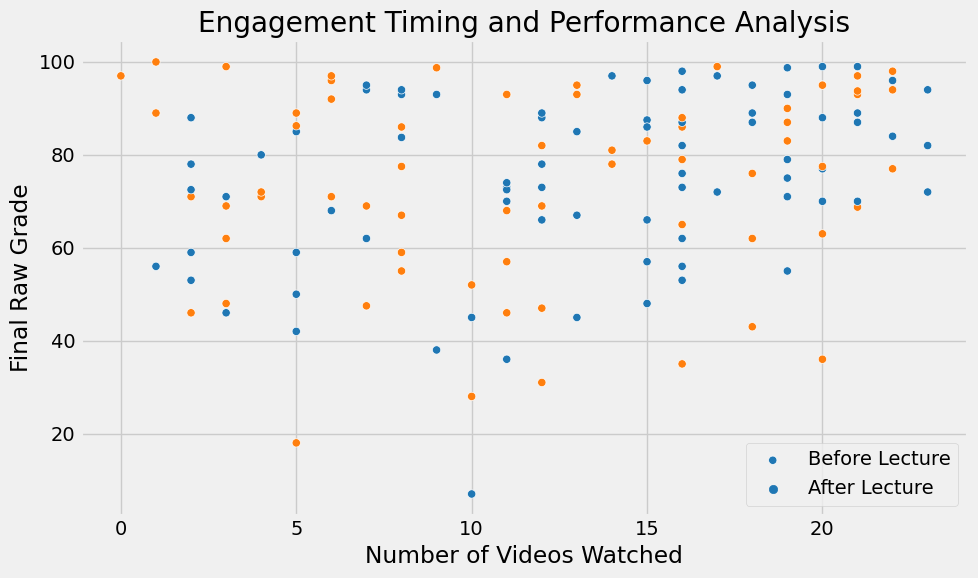

In [29]:
# Engagement Timing and Performance Analysis
plt.figure(figsize=(10, 6))

# Scatter plot of videosum vs. final_raw by vgroup
sns.scatterplot(data=cal_df, x='videosum', y='final_raw', hue='vgroup', palette=custom_palette)
plt.title("Engagement Timing and Performance Analysis")
plt.xlabel("Number of Videos Watched")
plt.ylabel("Final Raw Grade")
plt.legend(["Before Lecture", "After Lecture"])

plt.tight_layout()
plt.show()

* The scatter plot shows that students who watched more videos tend to have a wider range of final raw grades.
* For both engagement timings, students who watched more videos exhibit a mix of higher and lower final raw grades.
* While there doesn't appear to be a strong linear correlation between videos watched and final raw grades, the visualization provides insight into the distribution of academic performance based on engagement.

## Overall Conclusion:

The analyses and visualizations presented shed light on the relationship between engagement timing, video engagement, and academic performance. While there may be differences in engagement levels based on timing, the direct impact of engagement on academic performance might be influenced by other factors as well. These insights can inform educators and researchers in understanding student behavior and its potential effects on learning outcomes.

<a id="data"></a>
# 4️⃣ㅣVideo-Specific Analysis:

* Explore which individual videos (e.g., v7_01, v11_02) show higher engagement.
* Correlate video engagement with performance metrics.

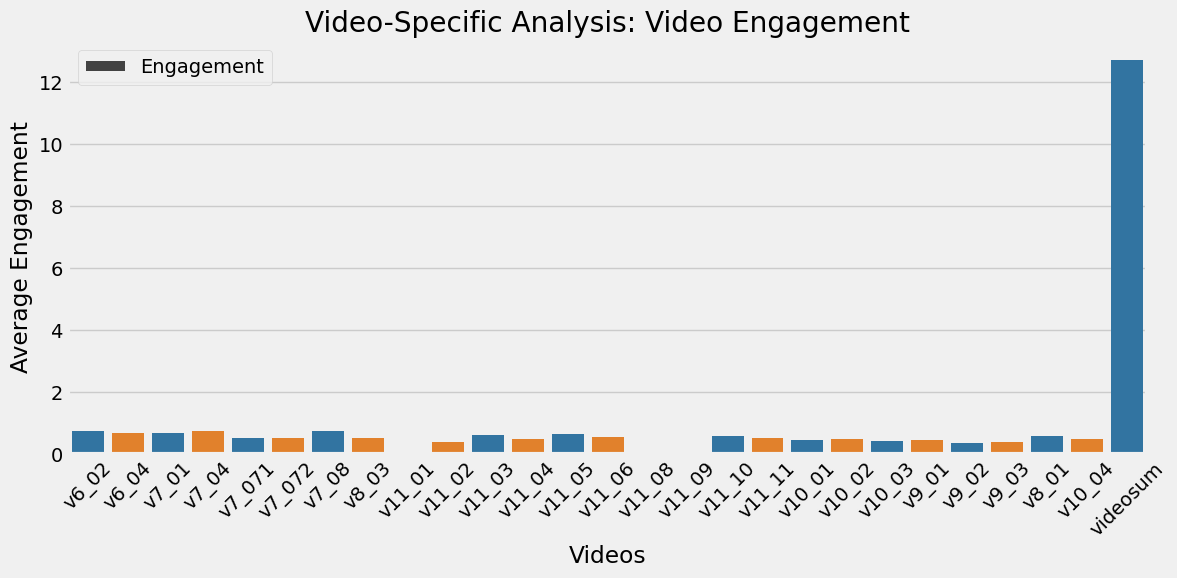

Correlation Analysis: Video Engagement vs. Performance Metrics
videosum     1.000000
final_raw    0.246248
dtype: float64


In [32]:
# Set a custom color palette for the plots
custom_palette = ["#1f77b4", "#ff7f0e"]

# Video-Specific Analysis: Video Engagement
video_columns = cal_df.columns[3:30]
engagement_by_video = cal_df[video_columns].mean()

# Bar plot of video engagement by video
plt.figure(figsize=(12, 6))
sns.barplot(x=video_columns, y=engagement_by_video, palette=custom_palette)
plt.title("Video-Specific Analysis: Video Engagement")
plt.xlabel("Videos")
plt.ylabel("Average Engagement")
plt.xticks(rotation=45)
plt.legend(["Engagement"])

plt.tight_layout()
plt.show()

# Correlation Analysis: Video Engagement vs. Performance Metrics
correlation_metrics = ['videosum', 'final_raw', 'sat_math', 'math_place']
correlation_with_videosum = cal_df[correlation_metrics].corrwith(cal_df['videosum'])

# Print correlation values
print("Correlation Analysis: Video Engagement vs. Performance Metrics")
print(correlation_with_videosum)

* The bar plot displays the average engagement for each individual video.
* Videos with higher bars indicate higher average engagement by students.
* The correlation analysis calculates the correlations between video engagement (videosum) and performance metrics.
* Positive correlations indicate that higher video engagement is associated with higher performance metrics, and vice versa.

### Analyzing Correlation Results

* Positive correlation values suggest that students who watch more videos tend to have higher final raw grades, SAT Math scores, and math placement scores.
* A positive correlation with videosum indicates that students who engage more with videos tend to perform better in the course.